<a href="https://colab.research.google.com/github/SachinScaler/July25ProbabilityAndStats/blob/main/CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo -O weight-height.csv


--2025-08-04 16:14:37--  https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.google.com (drive.google.com)... 142.251.107.102, 142.251.107.139, 142.251.107.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.107.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo [following]
--2025-08-04 16:14:37--  https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.006s  

2025-08-04 16:14:38 (72

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


df_hw = pd.read_csv('weight-height.csv')
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df_height = df_hw["Height"]
df_height.shape

(10000,)

-

In [5]:
print("Population Mean", df_height.mean())
print("Population Standard Deviation", df_height.std())

Population Mean 66.36755975482124
Population Standard Deviation 3.8475281207732324


### Sampling Distribution

In [8]:
sample_size = 5
sample1 = df_height.sample(sample_size)
sample1

,Height
1427,70.300179
145,70.515860
2803,66.175870
3190,69.509852
9236,63.347788


In [9]:
sample1.mean()

np.float64(67.9699099186287)

In [17]:
# sampling distribution
sampling_distribution_5 = []
for i in range(1000):
    # create sample for each iteration
    sample = df_height.sample(sample_size)

    # calculate mean of each sample and append
    sampling_distribution_5.append(sample.mean())

sampling_distribution_5 = np.array(sampling_distribution_5)
sampling_distribution_5[:10]

array([67.68546828, 66.15521225, 67.671279  , 64.50257649, 65.38621863,
       67.38588282, 69.60563423, 68.37697218, 63.64345891, 65.27218588])

<Axes: ylabel='Count'>

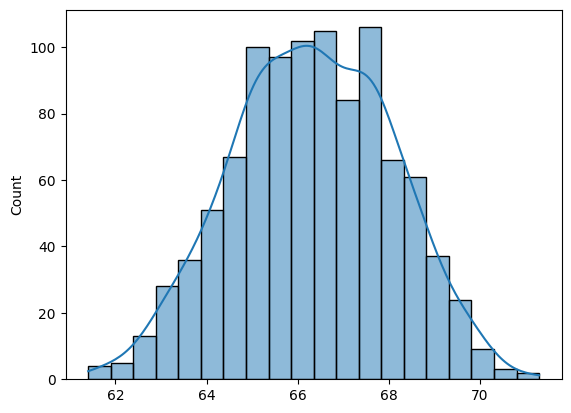

In [18]:
sns.histplot(sampling_distribution_5, kde=True)

In [20]:
print("Sampling Distribution Mean(n=5)", sampling_distribution_5.mean())
print("Sampling Distribution Standard Deviation(n=5)",sampling_distribution_5.std())

Sampling Distribution Mean(n=5) 66.32178913341325
Sampling Distribution Standard Deviation(n=5) 1.7460265317911068


In [21]:
print("Population Mean", df_height.mean())
print("Population Standard Deviation", df_height.std())

Population Mean 66.36755975482124
Population Standard Deviation 3.8475281207732324


In [22]:
# sampling distribution
sample_size = 20

sampling_distribution_20 = []
for i in range(1000):
    # create sample for each iteration
    sample = df_height.sample(sample_size)

    # calculate mean of each sample and append
    sampling_distribution_20.append(sample.mean())

sampling_distribution_20 = np.array(sampling_distribution_20)
sampling_distribution_20[:10]

array([65.17571537, 66.02735356, 65.94602769, 65.06121099, 67.02543458,
       67.05579838, 65.55157825, 65.79987484, 66.18631897, 67.48294481])

<Axes: ylabel='Count'>

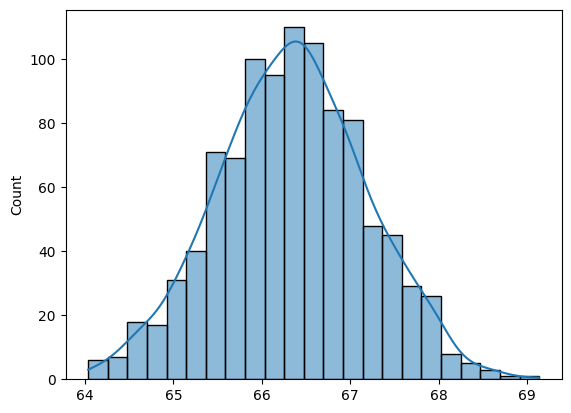

In [23]:
sns.histplot(sampling_distribution_20, kde=True)

In [27]:
print("Sampling Distribution Mean(n=20)", sampling_distribution_20.mean())
print("Sampling Distribution Standard Deviation(n=20)",sampling_distribution_20.std())

Sampling Distribution Mean(n=20) 66.34325778550209
Sampling Distribution Standard Deviation(n=20) 0.838190705568755


In [25]:
print("Population Mean", df_height.mean())
print("Population Standard Deviation", df_height.std())

Population Mean 66.36755975482124
Population Standard Deviation 3.8475281207732324


### Question1:

In [28]:
u = 122
pop_sig = 10

In [29]:
# step 1: p(Mean_X_16>125)
se = pop_sig/np.sqrt(16)
se

np.float64(2.5)

In [31]:
# step2: calculate z_score
z_score = (125-u)/se
z_score

np.float64(1.2)

In [33]:
P_X_125 = norm.cdf(z_score) # p(x<=125)
P_X_125

np.float64(0.8849303297782918)

In [34]:
P_X_Greater_125 = 1 - P_X_125
P_X_Greater_125

np.float64(0.11506967022170822)

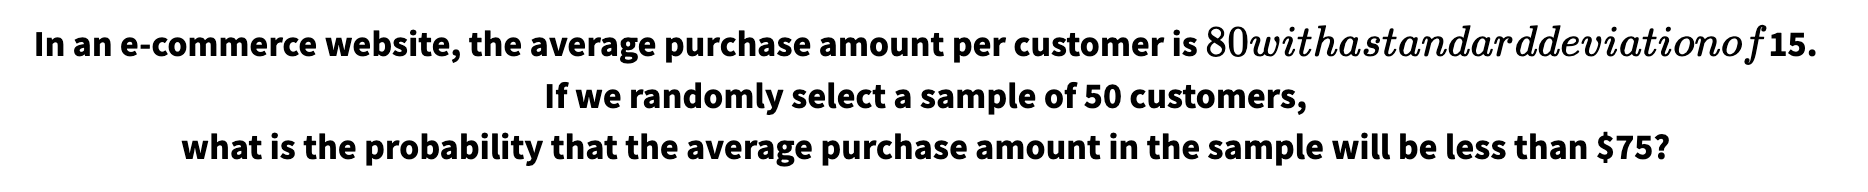

In [35]:
u = 80
sig_pop = 15
n = 50

se = sig_pop/np.sqrt(n)
se

np.float64(2.1213203435596424)

In [36]:
z_score = (75- 80)/se

z_score

np.float64(-2.3570226039551585)

In [37]:
prob = norm.cdf(z_score)
prob

np.float64(0.009211062727049501)

### Z Scores

In [38]:
# 95 %
z1, z2 = norm.ppf(0.025), norm.ppf(1 - 0.025)
z1, z2

(np.float64(-1.9599639845400545), np.float64(1.959963984540054))

In [39]:
# 99 %
z1, z2 = norm.ppf(0.005), norm.ppf(1 - 0.005)
z1, z2

(np.float64(-2.575829303548901), np.float64(2.5758293035489004))

## SE

In [41]:
std_error = 2.5/np.sqrt(100)
std_error

np.float64(0.25)

In [42]:
z_l = norm.ppf(0.025)
z_l

np.float64(-1.9599639845400545)

In [43]:
z_u = norm.ppf(1 - 0.025)
z_u

np.float64(1.959963984540054)

In [44]:
x_upper = 65 + z_u * std_error
x_upper

np.float64(65.48999099613502)

In [47]:
x_lower = 65 + z_l * std_error
x_lower

np.float64(64.51000900386498)

### Shortcut to directly get CI of any CL

In [48]:
norm.interval(0.90, 45, 10/np.sqrt(80))

(np.float64(43.16099773854971), np.float64(46.83900226145029))

In [49]:
norm.interval(0.99, 6, 2/np.sqrt(25))

(np.float64(4.96966827858044), np.float64(7.03033172141956))

### Bootstrap Sampling

In [51]:
survey_1 = [35, 36, 33, 37, 34, 35]
np.mean(survey_1)


np.float64(35.0)

In [53]:
# sample n = 10 items from survey_1 with replacement
bootstrapped_samples = np.random.choice(survey_1, size = 10, replace = True)
bootstrapped_samples

array([37, 34, 34, 34, 37, 36, 33, 37, 35, 35])

<Axes: ylabel='Count'>

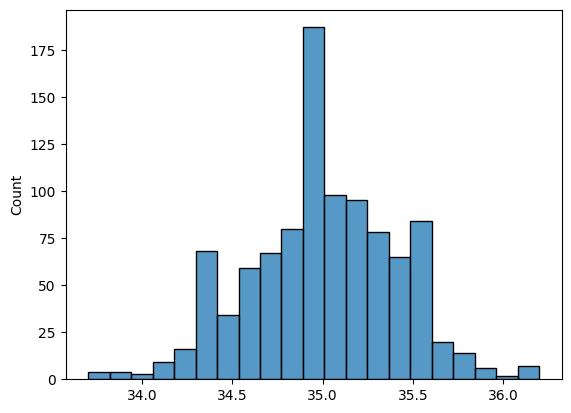

In [54]:
bootstrapped_means = []
for i in range(1000):
    bootstrapped_samples = np.random.choice(survey_1, size = 10, replace = True)
    bootstrapped_means.append(np.mean(bootstrapped_samples))

sns.histplot(bootstrapped_means)

In [55]:
# point estimate
np.mean(bootstrapped_means)

np.float64(35.001)

In [56]:
# Calculate CI associated with 95 CL